## Time Series Analysis

### Description:

This notebook aims to analyse each of the Time Series that are used in this project.

Instead of doing descriptive analysis in each of the notebooks, they will all be done here, even though we wont export the information gathered directly for other notebooks. 

With that being said, this should be the first notebook to be executed and analysed, since all the other ones, which will focus mainly on the methods for modeling and forecasting will assume informations that are discovered here, such as the existence of missing values, stationarity, ACF and PACF functions, seasonality and more.

Other notebooks may, and most probably will, implement some functions to deal with parts of that analysis, but they won't be as clear and exposed as it is found in this notebook.

### Packages Needed

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Some Useful Functions

In [5]:
# Filtering the data
def filterData(df,freq):
#     print('Nome')
    series = df.loc[:,["Date","Adj Close"]]
#     print(series)
    series.set_index("Date",inplace=True)
#     print(series)
    series.index=pd.to_datetime(series.index)
#     print(series)
    series = series.asfreq(freq)
#     print(series)
    return series

#Ploting a single time series
def plot_series(serie,title,xlabel,ylabel):
    fig = plt.figure()
    plt.plot(serie)
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.show()
    

## Reading the Data

In [6]:
USD_BRL_df = pd.read_csv('../data/BRL=X.csv')
USD_CAD_df = pd.read_csv('../data/CAD=X.csv')
AmericanAirlines_df = pd.read_csv('../data/AAL2010_2019.csv')

print('American',AmericanAirlines_df.head())
print('USD/BRL',USD_BRL_df.head())
print('USB/CAD',USD_CAD_df.head())

American          Date  Open  High   Low  Close  Adj Close    Volume
0  2010-01-01  4.84  5.43  4.66   5.24   4.939965  65680600
1  2010-01-08  5.27  5.71  4.94   5.59   5.269927  60750800
2  2010-01-15  5.64  5.96  5.42   5.46   5.147369  47723100
3  2010-01-22  5.48  5.52  4.47   5.14   4.845691  69231800
4  2010-01-29  5.23  6.00  5.17   5.49   5.175651  65152000
USD/BRL          Date    Open    High     Low   Close  Adj Close  Volume
0  2010-01-01  1.6930  1.7472  1.6713  1.7389     1.7389       0
1  2010-01-08  1.6954  1.7698  1.6765  1.7641     1.7641       0
2  2010-01-15  1.7085  1.8032  1.7085  1.8008     1.8008       0
3  2010-01-22  1.7525  1.8712  1.7525  1.8680     1.8680       0
4  2010-01-29  1.8200  1.8952  1.7797  1.8804     1.8804       0
USB/CAD          Date    Open    High     Low   Close  Adj Close  Volume
0  2010-01-01  1.0517  1.0530  1.0290  1.0340     1.0340       0
1  2010-01-08  1.0338  1.0412  1.0223  1.0234     1.0234       0
2  2010-01-15  1.0235  1.0522 

## Filtering the dataframes

We want only the *Date*, which will be our index, and *Adj Close*, which is the actual "variable" we want to model and predict.

In [7]:
#Something is odd with the frequency. Our series are weekly, but when freq='w' we get all NaN

USD_CAD_serie = filterData(USD_CAD_df,'d')
USD_BRL_serie = filterData(USD_BRL_df,'d')
AmericanAirlines_serie = filterData(AmericanAirlines_df,'d')

print('American',AmericanAirlines_serie.head())
print('USD/BRL',USD_BRL_serie.head())
print('USD/CAD',USD_CAD_serie.head())

American             Adj Close
Date                 
2010-01-01   4.939965
2010-01-02        NaN
2010-01-03        NaN
2010-01-04        NaN
2010-01-05        NaN
USD/BRL             Adj Close
Date                 
2010-01-01     1.7389
2010-01-02        NaN
2010-01-03        NaN
2010-01-04        NaN
2010-01-05        NaN
USD/CAD             Adj Close
Date                 
2010-01-01      1.034
2010-01-02        NaN
2010-01-03        NaN
2010-01-04        NaN
2010-01-05        NaN


## Looking for missing values and other issues

It is important to look for missing values because they can, and probably will, interfere in our models

In [18]:
print('American',AmericanAirlines_serie.isnull().sum())
print('USD/BRL',USD_BRL_serie.isnull().sum())
print('USD/CAD',USD_CAD_serie.isnull().sum())

American Adj Close    0
dtype: int64
USD/BRL Adj Close    0
dtype: int64
USD/CAD Adj Close    0
dtype: int64


In [19]:
#We will fill the missing values with interpolation
AmericanAirlines_serie = AmericanAirlines_serie.interpolate()
USD_BRL_serie = USD_BRL_serie.interpolate()
USD_CAD_serie = USD_CAD_serie.interpolate()

print('American',AmericanAirlines_serie.isnull().sum())
print('USD/BRL',USD_BRL_serie.isnull().sum())
print('USD/CAD',USD_CAD_serie.isnull().sum())

American Adj Close    0
dtype: int64
USD/BRL Adj Close    0
dtype: int64
USD/CAD Adj Close    0
dtype: int64


## Plotting the Series

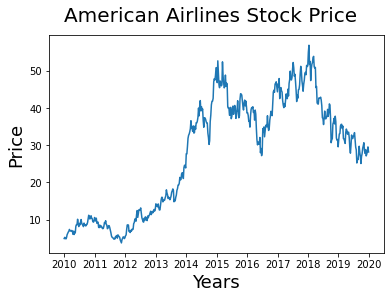

In [20]:
plot_series(AmericanAirlines_serie,'American Airlines Stock Price',xlabel='Years',ylabel='Price')

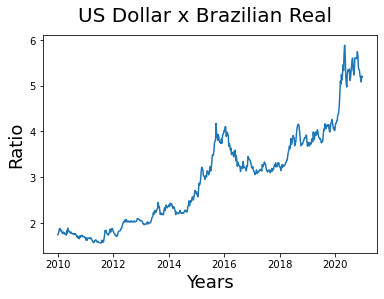

In [21]:
plot_series(USD_BRL_serie,'US Dollar x Brazilian Real',xlabel='Years',ylabel='Ratio')

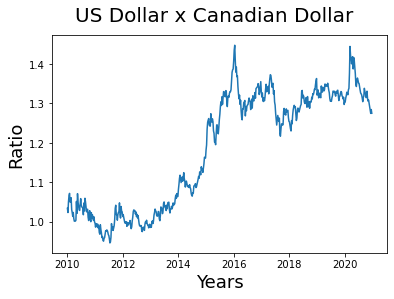

In [22]:
plot_series(USD_CAD_serie,'US Dollar x Canadian Dollar',xlabel='Years',ylabel='Ratio')

## Coments regarding the series behavior

By looking at the plots from the series, we suspect that all of them are non-stationary an non-seasonal.

We still need to get more insight on that behavior, but the visual analysis is, probably, enought.

The fact that the series are non-stationary is a problem for both ARIMA and GARCH models, so we need to make them stationary.

For the Neural Networks, it may not be a problem and we will discuss this in the Neural Networks notebooks.

Let's get more insight on the behavior of each series.

In [23]:
adf_BRL = adfuller(USD_BRL_serie)
adf_CAD = adfuller(USD_CAD_serie)
adf_American = adfuller(AmericanAirlines_serie)


print('American',adf_American)
print('USD/BRL',adf_BRL)
print('USD/CAD',adf_CAD)

American (-1.67509941825314, 0.44398550248923796, 0, 521, {'1%': -3.4429638415440995, '5%': -2.867103482127635, '10%': -2.569733131582922}, 1930.7286352689343)
USD/BRL (0.15537369554430283, 0.9696445936835891, 13, 560, {'1%': -3.442081300525009, '5%': -2.8667149792729596, '10%': -2.569526100127551}, -1282.2288663687063)
USD/CAD (-1.2437077408786428, 0.6545169904248803, 0, 573, {'1%': -3.4418139386911513, '5%': -2.866597262008035, '10%': -2.5694633721967906}, -3234.4160803054056)


We want to look at the second value in those prints. This is the **p-value**, that, if **less than 0.05**, means we have rejected the **Null Hypothesis** and the series is stationary.

None of our series, as suggested before, is stationary.

## Creating a stationary series

In order to make our series stationary, we will differenciate them, as follows.

In [24]:
USD_BRL_serie_diff1 = USD_BRL_serie - USD_BRL_serie.shift(1)
USD_CAD_serie_diff1 = USD_CAD_serie - USD_CAD_serie.shift(1)
AmericanAirlines_serie_diff1 = AmericanAirlines_serie - AmericanAirlines_serie.shift(1)

USD_BRL_serie_diff1 = USD_BRL_serie_diff1.dropna()
USD_CAD_serie_diff1 = USD_CAD_serie_diff1.dropna()
AmericanAirlines_serie_diff1 = AmericanAirlines_serie_diff1.dropna()

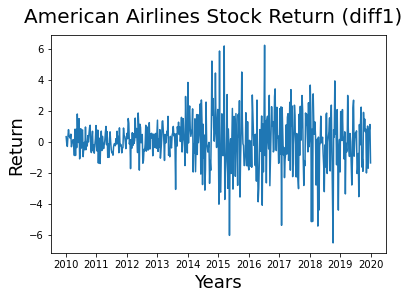

In [25]:
plot_series(AmericanAirlines_serie_diff1,'American Airlines Stock Return (diff1)',xlabel='Years',ylabel='Return')

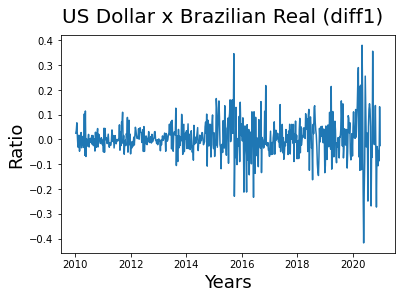

In [26]:
plot_series(USD_BRL_serie_diff1,'US Dollar x Brazilian Real (diff1)',xlabel='Years',ylabel='Ratio')

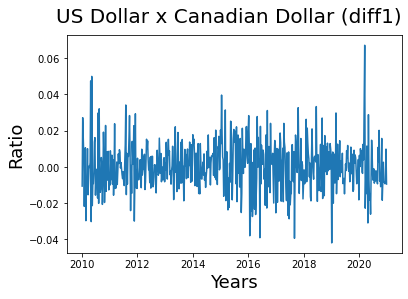

In [27]:
plot_series(USD_CAD_serie_diff1,'US Dollar x Canadian Dollar (diff1)',xlabel='Years',ylabel='Ratio')

In [28]:
adf_BRL = adfuller(USD_BRL_serie_diff1)
adf_CAD = adfuller(USD_CAD_serie_diff1)
adf_American = adfuller(AmericanAirlines_serie_diff1)


print('USD/BRL',adf_BRL)
print('USD/CAD',adf_CAD)
print('American',adf_American)

USD/BRL (-6.61190499097574, 6.345997433118345e-09, 12, 560, {'1%': -3.442081300525009, '5%': -2.8667149792729596, '10%': -2.569526100127551}, -1282.0254460102133)
USD/CAD (-25.436979600710792, 0.0, 0, 572, {'1%': -3.441834071558759, '5%': -2.8666061267054626, '10%': -2.569468095872659}, -3229.5076687078426)
American (-23.733164697798678, 0.0, 0, 520, {'1%': -3.4429882202506255, '5%': -2.8671142122781066, '10%': -2.569738849852071}, 1928.753608434849)


## Stationarity Results

Now all of out series are stationary.

It took 1 difference for **USD/CAD**, **American Airlines** and **USD/BRL**.

That information is important for the **ARIMA** and **GARCH** models.

## Seasonality Analysis

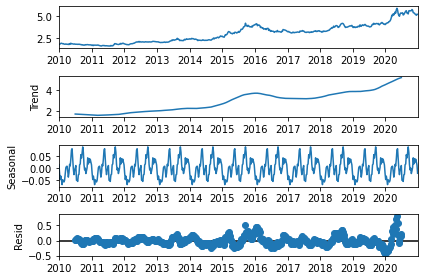

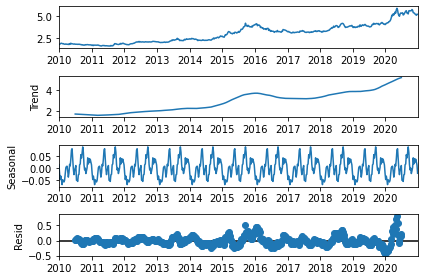

In [33]:
seasonal_decompose(USD_BRL_serie).plot()

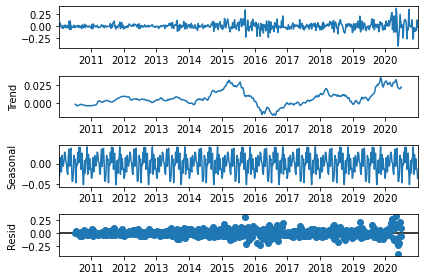

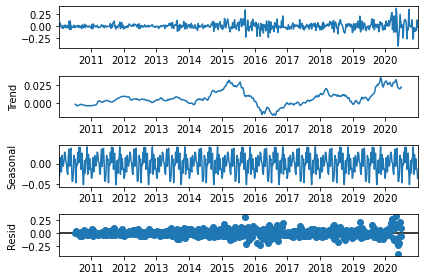

In [39]:
seasonal_decompose(USD_BRL_serie_diff1).plot()

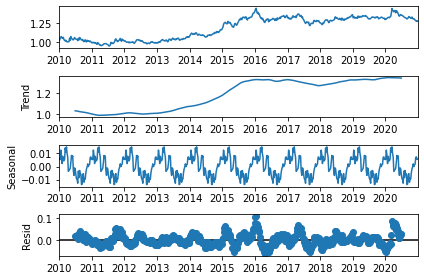

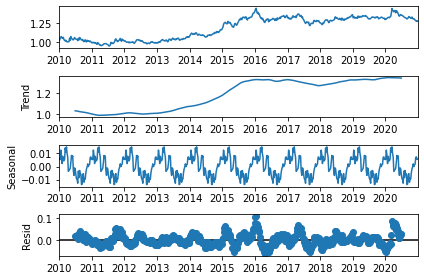

In [35]:
seasonal_decompose(USD_CAD_serie).plot()

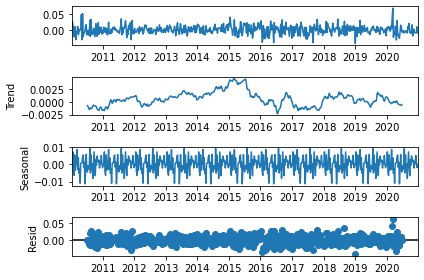

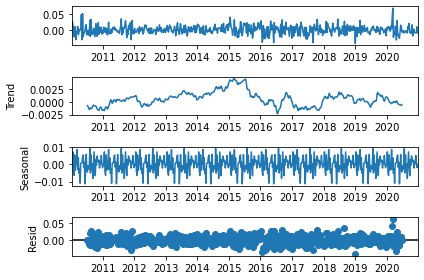

In [36]:
seasonal_decompose(USD_CAD_serie_diff1).plot()

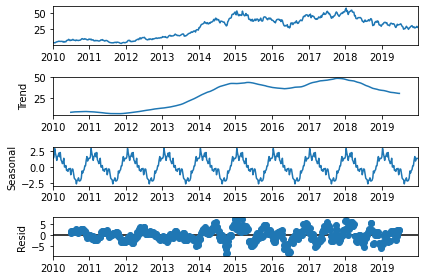

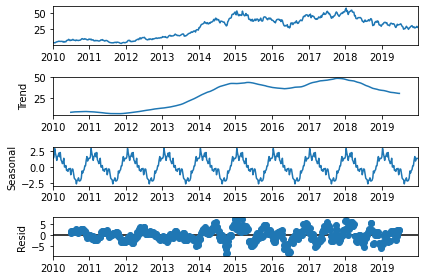

In [37]:
seasonal_decompose(AmericanAirlines_serie).plot()

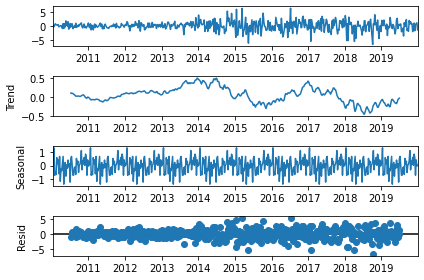

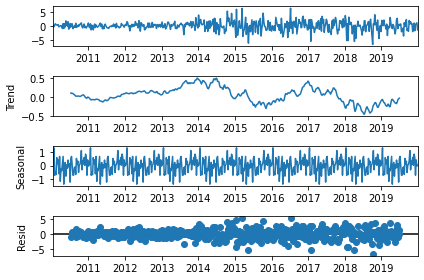

In [38]:
seasonal_decompose(AmericanAirlines_serie_diff1).plot()

## Conclusion regarding seasonality

Any of the series, neither the original ones, nor the differentiate ones, is seasonal.

## Correlation Analysis

The next step in out Time Series Analysis should be to create the **Autocorrelation and Partial Autocorrelation Functions**, in order to determine the parameters of the **ARIMA Model** and **GARCH Model**.


C:\Users\matno\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


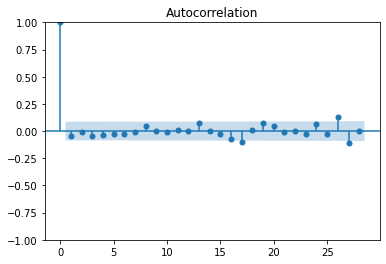

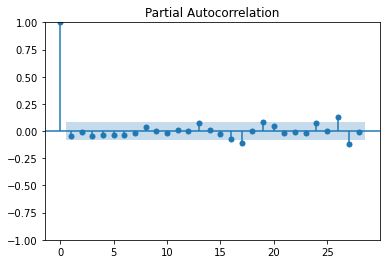

In [40]:
acf_American_diff1 = plot_acf(AmericanAirlines_serie_diff1)
pacf_American_diff1 = plot_pacf(AmericanAirlines_serie_diff1)

C:\Users\matno\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


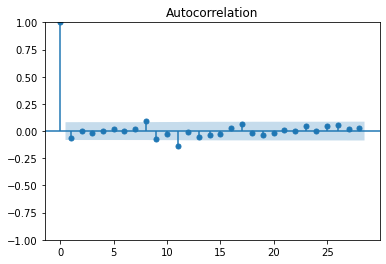

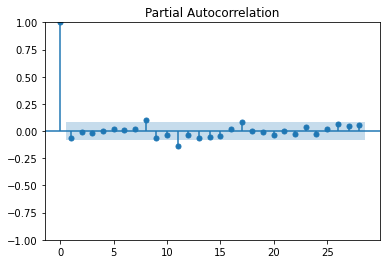

In [41]:
acf_USD_CAD_diff1 = plot_acf(USD_CAD_serie_diff1)
Pacf_USD_CAD_diff1 = plot_pacf(USD_CAD_serie_diff1)

C:\Users\matno\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


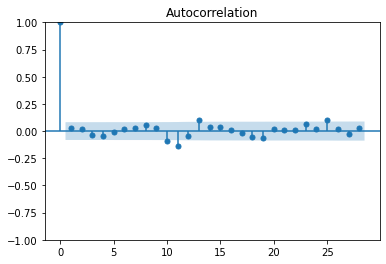

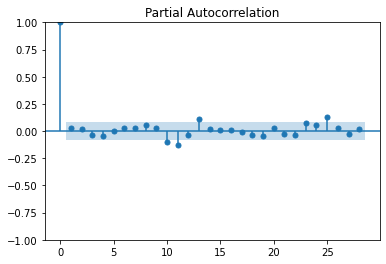

In [42]:
acf_USD_BRL_diff1 = plot_acf(USD_BRL_serie_diff1)
Pacf_USD_BRL_diff1 = plot_pacf(USD_BRL_serie_diff1)

## Correlation Results

All series seem to have lag-1 as an important lag for the models, both for ACF and PACF, so the order of the **ARIMA** Model must be (1,d,1) and for the **GARCH** Model, (1,1)